# US Accidents Exploratory Data Analysis (EDA)
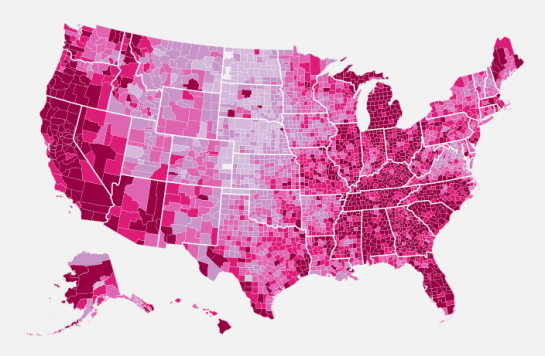

### 1. Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import folium
from folium.plugins import HeatMap

In [2]:
custom_params = {"axes.facecolor": "black","axes.edgecolor" : "black", "axes.grid": True, "axes.axisbelow": True, "axes.labelcolor": "white","figure.facecolor": "black","grid.color": "#17202A","text.color": "white","xtick.color": "white","ytick.color": "white","axes.spines.left": False,"axes.spines.bottom": False,"axes.spines.right": False,"axes.spines.top": False,}
sns.set_theme(style='whitegrid', rc=custom_params, font_scale=1.5)

In [3]:
pd.set_option('display.max_columns', None)

## 2. Data Preperation and cleaning

- Load the file using pandas
- Look at some information about the data and the columns
- Fix any missing or incorrect values

In [4]:
df = pd.read_csv('US_Accidents_Dec21_updated.csv')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [6]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(2845342, 47)

In [9]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

### Percentage of missing values per column

<AxesSubplot:>

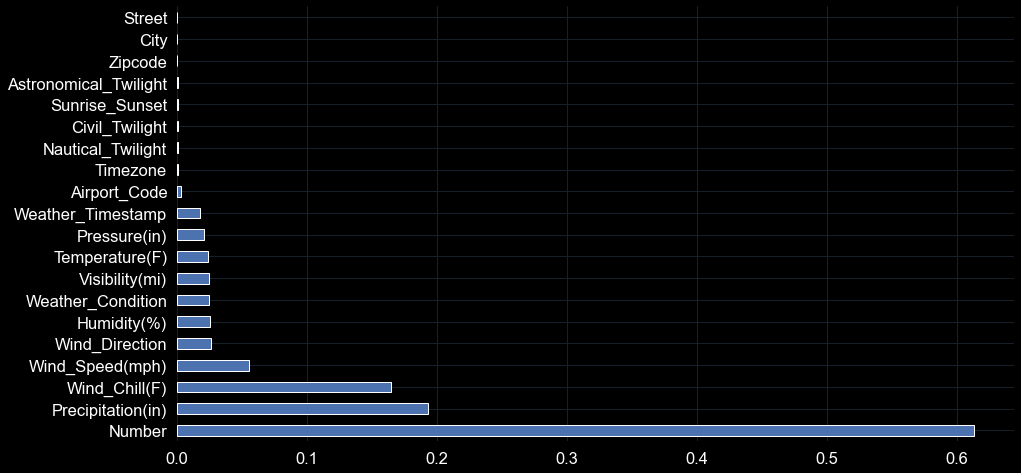

In [10]:
f, ax = plt.subplots(figsize=(15, 8))

missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)

missing_percentages[missing_percentages != 0].plot(kind='barh')

### Handling all the missing values


In [11]:
df.isnull().sum().sum()

3414349

In [12]:
df.drop(['Number'], axis=1, inplace=True)

In [13]:
# Filling in the missing values in some of the columns related to weather

df["Wind_Chill(F)"] = df['Wind_Chill(F)'].fillna(df['Wind_Chill(F)'].mean())
df["Precipitation(in)"] = df['Precipitation(in)'].fillna(df['Precipitation(in)'].mean())
df["Wind_Speed(mph)"] = df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].mean())

In [14]:
df.isnull().sum().sum()

493393

## 3. Exploratory Analysis and Visualization

Columns we'll analyze:

 - City
 - State
 - Start Time
 - Start Lat, Start Lng
 - Temperature
 - Weather Condition
 - Locations

#### Which state has the maximum no: of accidents?

In [15]:
state_wise_counts = df.groupby('State')['ID'].count().reset_index()

In [16]:
state_wise_counts = state_wise_counts.sort_values(by = "ID",ascending=False)

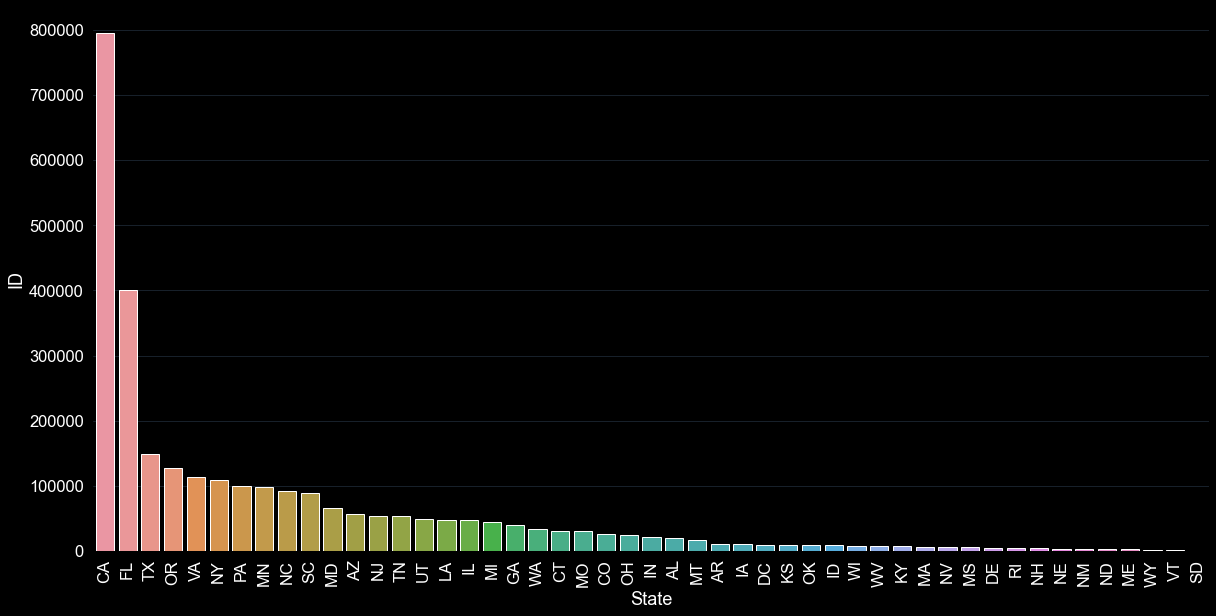

In [17]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x="State", y="ID", data=state_wise_counts)
plt.xticks(rotation=90)
plt.show()

### Choropleth state wise distribution of accidents

In [18]:
df_states_count = pd.value_counts(df['State'])


fig = px.choropleth(
    df,
    locations=df_states_count.index,
    color_continuous_scale='spectral_r',
    locationmode='USA-states',
    color=df_states_count.values.astype(float),
    title="US accidents by State",
    scope="usa"
)
fig.show()

### Top 10 cities by the number of accidents

In [19]:
cities = df.City.unique()
len(cities)

11682

In [20]:
city_wise_counts = df.City.value_counts()
city_wise_counts.head(10)

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
Charlotte       33152
Sacramento      32559
San Diego       26627
Raleigh         22840
Minneapolis     22768
Name: City, dtype: int64

#### Higest 10 cities in "CA" in terms of number of accidents

In [21]:
CA_cities=df.loc[df['State'] == 'CA'][['ID','City']]
cities_count=CA_cities.groupby('City')['ID'].count().reset_index().sort_values(by = "ID",ascending=False)
cities_count=cities_count[:10]

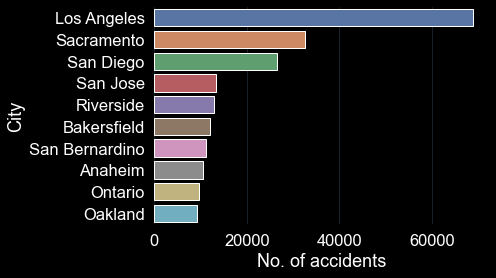

In [22]:
ax=sns.barplot(y="City", x='ID', data=cities_count)
ax.set(xlabel='No. of accidents', ylabel='City')

plt.show()

#### Top 10 cities in terms of number of accidents across different states

In [23]:
high_cities=df.groupby('City')['ID'].count().reset_index().sort_values(by = "ID",ascending=False)
high_cities=high_cities[:10]

[Text(0.5, 0, 'No. of accidents'), Text(0, 0.5, 'City')]

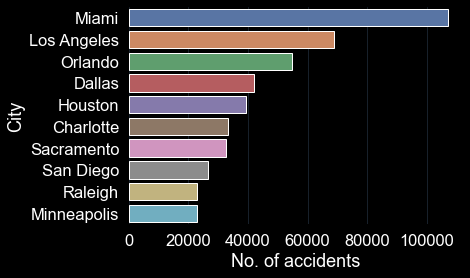

In [24]:
ax=sns.barplot(y="City", x='ID', data=high_cities)
ax.set(xlabel='No. of accidents', ylabel='City')

### Accidents based on Time

In [25]:
df.Start_Time = pd.to_datetime(df.Start_Time)

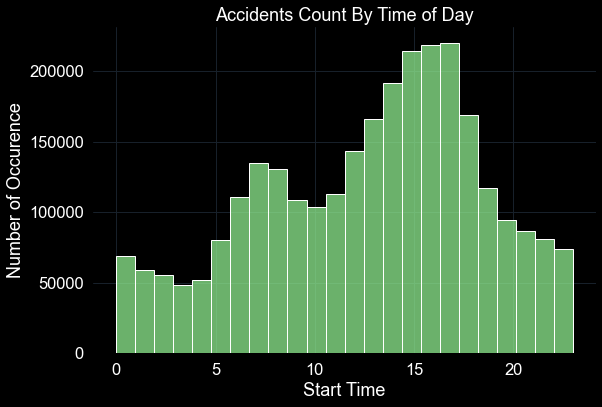

In [26]:
# To find the accidents by time of day

fig, ax = plt.subplots(figsize=(9,6))
sns.histplot(df.Start_Time.dt.hour,bins=24,kde=False,color='lightgreen')

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

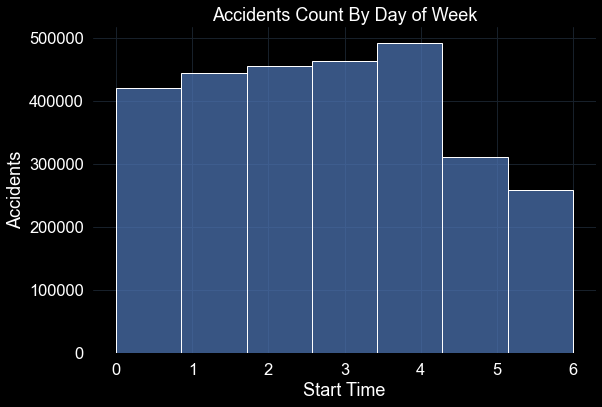

In [27]:
# To find the accidents by Day of the week

fig, ax = plt.subplots(figsize=(9,6))
sns.histplot(df.Start_Time.dt.dayofweek,bins=7,kde=False)

plt.xlabel("Start Time")
plt.ylabel("Accidents")
plt.title('Accidents Count By Day of Week')

plt.show()

### Accidents count by month

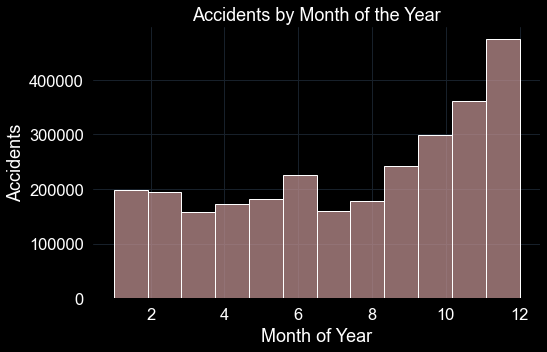

In [28]:
# To find the accidents by the month of the year

fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df['Start_Time'].dt.month, bins = 12,color='rosybrown')

plt.xlabel("Month of Year")
plt.ylabel("Accidents")
plt.title('Accidents by Month of the Year')

plt.show()

### Accidents count at each year

Text(0.5, 1.0, 'Accidents Count By Year')

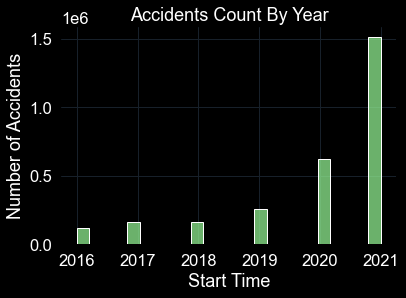

In [29]:
sns.histplot(df.Start_Time.dt.year,bins=24,kde=False,color='lightgreen')

plt.xlabel("Start Time")
plt.ylabel("Number of Accidents")
plt.title('Accidents Count By Year')

### Accidents based on Severity

In [30]:
df_severity = df.groupby('Severity')['ID'].count()
df_severity

Severity
1      26053
2    2532991
3     155105
4     131193
Name: ID, dtype: int64

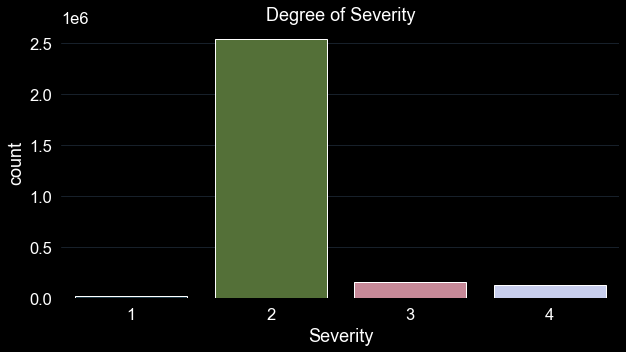

In [31]:
fig, ax = plt.subplots(figsize = (10,5))
sev = sns.countplot(x="Severity", data=df, palette = "cubehelix")
sev.set_title("Degree of Severity")

plt.show()

### Accidents based on Location

In [32]:
location = df.iloc[:, 29:43]
location.head()

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
1,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
2,False,False,False,False,True,False,False,False,False,False,False,False,False,Night
3,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
4,False,False,False,False,False,False,False,False,False,False,False,False,False,Day


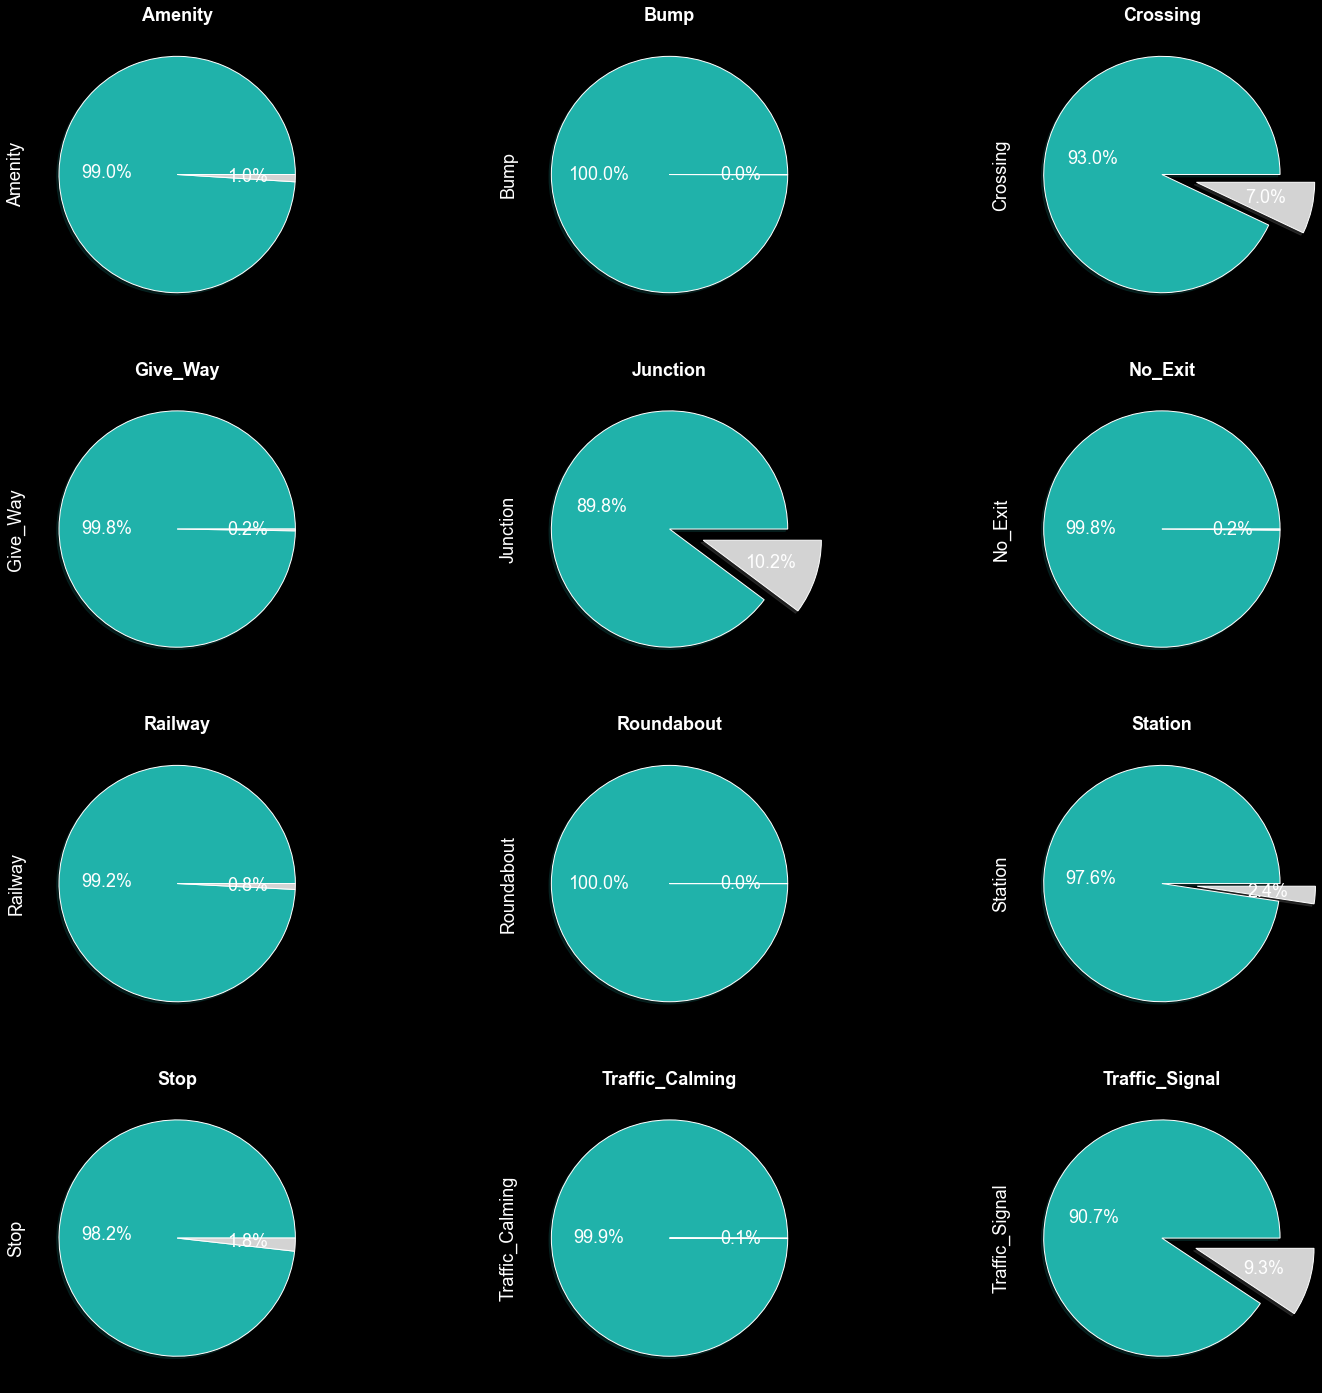

In [33]:
f,ax=plt.subplots(4,3,figsize=(25,25))
explode = [0,0.3]

ax[0,0] = location['Amenity'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,0],colors=["lightseagreen","lightgray"],shadow = True, labels=None)
ax[0,0].set_title("Amenity",fontweight ="bold")
ax[0,1] = location['Bump'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,1],colors=["lightseagreen","lightgray"],shadow = True, labels=None)
ax[0,1].set_title("Bump",fontweight ="bold")
ax[0,2] = location['Crossing'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,2],colors=["lightseagreen","lightgray"],explode=explode,shadow = True, labels=None)
ax[0,2].set_title("Crossing",fontweight ="bold")
ax[1,0] = location['Give_Way'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,0],colors=["lightseagreen","lightgray"],shadow = True, labels=None)
ax[1,0].set_title("Give_Way",fontweight ="bold")
ax[1,1] = location['Junction'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,1],colors=["lightseagreen","lightgray"],explode=explode,shadow = True, labels=None)
ax[1,1].set_title("Junction",fontweight ="bold")
ax[1,2] = location['No_Exit'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,2],colors=["lightseagreen","lightgray"],shadow = True, labels=None)
ax[1,2].set_title("No_Exit",fontweight ="bold")
ax[2,0] = location['Railway'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,0],colors=["lightseagreen","lightgray"],shadow = True, labels=None)
ax[2,0].set_title("Railway",fontweight ="bold")
ax[2,1] = location['Roundabout'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,1],colors=["lightseagreen","lightgray"],shadow = True, labels=None)
ax[2,1].set_title("Roundabout",fontweight ="bold")
ax[2,2] = location['Station'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,2],colors=["lightseagreen","lightgray"],explode=explode,shadow = True, labels=None)
ax[2,2].set_title("Station",fontweight ="bold")
ax[3,0] = location['Stop'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,0],colors=["lightseagreen","lightgray"],shadow = True, labels=None)
ax[3,0].set_title("Stop",fontweight ="bold")
ax[3,1] = location['Traffic_Calming'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,1],colors=["lightseagreen","lightgray"],shadow = True, labels=None)
ax[3,1].set_title("Traffic_Calming",fontweight ="bold")
ax[3,2] = location['Traffic_Signal'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,2],colors=["lightseagreen","lightgray"],explode=explode,shadow = True, labels=None)
ax[3,2].set_title("Traffic_Signal",fontweight ="bold")

plt.show()

### Start longitude and latitude

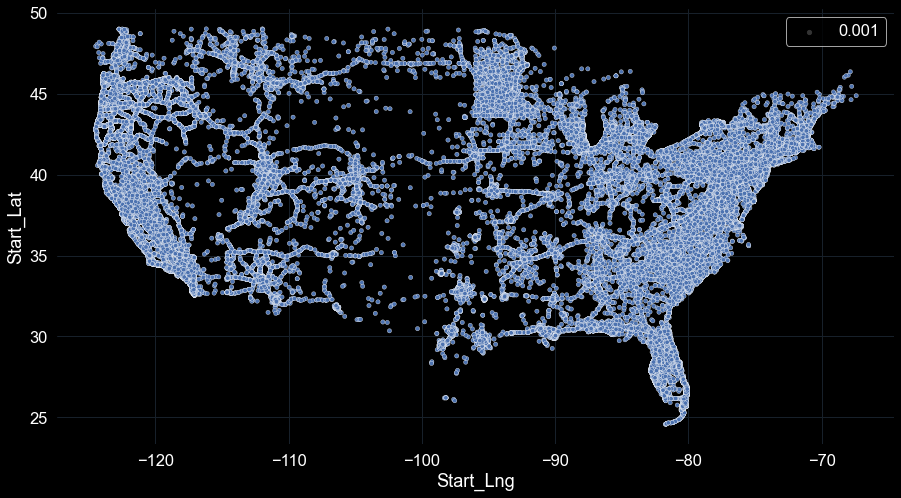

In [34]:
fig, ax = plt.subplots(figsize = (15,8))

sample_df = df.sample(int(0.1 * len(df)))

sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

plt.show()

In [35]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(40.10891, -83.09286)

In [36]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

579759     26.539857
2254341    39.074650
338285     25.684720
1349098    38.135701
1247178    28.336045
             ...    
2374445    45.437750
1682581    40.974272
2291424    32.838228
1322754    34.171933
2205105    41.938830
Name: Start_Lat, Length: 100, dtype: float64
579759     -80.072600
2254341    -76.543140
338285     -80.433263
1349098    -78.662205
1247178    -81.489814
              ...    
2374445   -122.765390
1682581    -73.859817
2291424   -117.134380
1322754    -80.709928
2205105    -87.746860
Name: Start_Lng, Length: 100, dtype: float64


In [37]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [38]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [39]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

# Insights

- California State has the most number of accidents.
- Miami has the highest accidents amongst any city
- Most of the accidents happen between 6am and 10am also between 12pm and 7pm 
- Accidents are more on weekdays than the weekends
- Degree 2 severity of accidents is more common than the other three
- Accidents are common at a junction, crossing or a traffic signal
